**Лекция 7**

# Сингулярное разложение матриц

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Преобразования-$\mathbf{A^\top-A}$-и-$\mathbf{A-A^\top}$" data-toc-modified-id="Преобразования-$\mathbf{A^\top-A}$-и-$\mathbf{A-A^\top}$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Преобразования $\mathbf{A^\top A}$ и $\mathbf{A A^\top}$</a></span></li><li><span><a href="#Сингулярные-базисы,-сингулярное-разложение" data-toc-modified-id="Сингулярные-базисы,-сингулярное-разложение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сингулярные базисы, сингулярное разложение</a></span></li><li><span><a href="#Геометрический-смысл" data-toc-modified-id="Геометрический-смысл-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Геометрический смысл</a></span><ul class="toc-item"><li><span><a href="#Спектральное-разложение" data-toc-modified-id="Спектральное-разложение-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Спектральное разложение</a></span></li><li><span><a href="#Сингулярное-разложение" data-toc-modified-id="Сингулярное-разложение-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сингулярное разложение</a></span></li><li><span><a href="#Связь-с-полярным-разложением" data-toc-modified-id="Связь-с-полярным-разложением-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Связь с полярным разложением</a></span></li></ul></li><li><span><a href="#Источники" data-toc-modified-id="Источники-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Постановка задачи

В прошлый раз мы увидели: некоторые квадратные матрицы могут быть представлены в виде $A = S \Lambda S^{-1}$.
Наилучшие представители квадратных матриц &mdash; симметричные матрицы &mdash; представимы в виде $A = Q \Lambda Q^\top$ ($Q$ &mdash; ортогональная матрица). \
Но как быть, если матрица недиагонализируема? И как быть, если матрица даже не квадратная?

Рассмотрим матрицу $A$ размерностью $m \times n$. \
Соответствующий ей линейный оператор переводит вектор $\mathbf{x}$ из $\mathbb{R}^n$ в $\mathbb{R}^m$.
Поэтому теперь нам потребуется два ортонормированных базиса &laquo;собственных&raquo; (на самом деле *сингулярных*) векторов $\mathbf{v}_1, \ldots, \mathbf{v}_n$ из $\mathbb{R}^n$ и $\mathbf{u}_1, \ldots, \mathbf{u}_m$ из $\mathbb{R}^m$.
И мы будем искать решение уравнения $A\mathbf{v} = \sigma \mathbf{u}$.

Или в матричном виде

$$ A V = U \Sigma $$
и
$$ A = U \Sigma V^\top. $$

---

## Преобразования $\mathbf{A^\top A}$ и $\mathbf{A A^\top}$

Рассмотрим преобразования $A^\top A$ и $A A^\top$.
Сначала повторим то, что уже знаем о них:

1. Ядро преобразования $A^\top A$ совпадает с ядром отображения $A$, а образ $A^\top A$ &mdash; с образом отображения $A^\top$.
1. Ранги матриц $A$, $A^\top$, $A^\top A$ и $AA^\top$ равны.
1. Матрицы $A^\top A$ и $A A^\top$ симметричные и неотрицательно определённые (все собственные значения $\lambda_i \ge 0$).

**Утверждение.** Если $\mathbf{x}$ &mdash; собственный вектор преобразования $A^\top A$, принадлежащий собственному значения $\lambda \ne 0$, то $A(\mathbf{x})$ &mdash; собственный вектор преобразования $A A^\top$, принадлежащий тому же собственному значению. При этом линейно независимым собственным векторам $\mathbf{x}_1, \ldots, \mathbf{x}_s$ преобразования $A^\top A$ соответствуют линейно независимые собственные векторы $A(\mathbf{x}_1), \ldots, A(\mathbf{x}_s)$ преобразования $A A^\top$.  
**Доказательство.** Пусть $A^\top A (\mathbf{x}) = \lambda \mathbf{x}$. Подействует отображением $A$ на обе части этого равенства: $(A A^\top) A(\mathbf{x}) = \lambda A(\mathbf{x})$. Вектор $A(\mathbf{x})$ собственный для $A A^\top$ и принадлежит значению $\lambda$. \
Вторую часть утверждения докажем от противного.
предположим, что векторы $A(\mathbf{x}_1), \ldots, A(\mathbf{x}_s)$ линейно зависимы и $\alpha_1 A(\mathbf{x}_1), \ldots, \alpha_s A(\mathbf{x}_s)$ &mdash; их нетривиальная линейная комбинация, равная нулю.
Подействовав на неё отображением $A^\top$, получим

$$
  \alpha_1 A^\top A(\mathbf{x}_1) + \ldots + \alpha_s A^\top A(\mathbf{x}_s) = \alpha_1 \lambda_1 \mathbf{x}_1 + \ldots + \alpha_s  \lambda_s \mathbf{x}_s = 0,
$$

что противоречит линейной независимости векторов $\mathbf{x}_1, \ldots, \mathbf{x}_s$.
Предложение доказано.

**Следствие.** Ненулевые собственные значения преобразований $A^\top A$ и $A A^\top$ совпадают, причём равные собственные значения имеют одинаковые кратности.

>**Замечание.** В доказательстве нигде не использовался тот факт, что вторая матрица в произведении является транспонированной первой.
Поэтому предложение о совпадении собственных значений справедливо и в общем случае &mdash; для матриц $AB$ и $BA$ (если, конечно, размерности матриц позволяют их таким образом умножать).

---

## Сингулярные базисы, сингулярное разложение

Итак, матрицы $A^\top A$ и $A A^\top$ можно представить в виде

$$ A^\top A = V \Lambda_1 V^\top  \tag{1}\label{AtA_decomp} $$
и 
$$ A A^\top = U \Lambda_2 U^\top. \tag{2}\label{AAt_decomp} $$

Причём матрицы $\Lambda_1$ и $\Lambda_2$ отличаются только размером: ненулевые диагональные элементы матриц совпадают.

**Определение.** *Первым сингулярным базисом* отображения $A$ называется ортонормированный базис в $\mathbb{R}^n$, состоящий из собственных векторов $\mathbf{v}_i$ преобразования $A^\top A$, если векторы базиса упорядочены так, что соответствующие собственные значения не возрастают: $\lambda_1 \ge \ldots \ge \lambda_n$.

**Определение.** Числа $\sigma_i = \sqrt{\lambda_i}$ называются *сингулярными числами* отображения $A$.

**Определение.** *Вторым сингулярным базисом* отображения $A$ называется ортонормированный базис в $\mathbb{R}^m$, состоящий из собственных векторов $\mathbf{u}_i$ преобразования $A A^\top$. Его первые $r$ векторов имеют вид $\mathbf{u}_i = \sigma_i^{-1} A(\mathbf{v}_i)$.


**Теорема.** Произвольная матрица $A$ размера $m \times n$ и ранга $r$ может быть представлена в виде

$$ A = U \Sigma V^\top, \tag{3}\label{SVD} $$

где $U$ &mdash; ортогональная матрица размера $m \times m$, $V^\top$ &mdash; ортогональная матрица размера $n \times n$, а $\Sigma$ &mdash; матрица, на главной диагонали у которой расположены $r$ положительных чисел $\sigma_1, \ldots, \sigma_r$, а остальные элементы нулевые.
Такое разложение называется *сингулярным разложением* (singular value decomposition, SVD).


В самом деле, подставляя выражение $\eqref{SVD}$ в разложения $\eqref{AtA_decomp}$ и $\eqref{AAt_decomp}$, получим

$$ A^\top A = V \Sigma^\top U^\top \cdot U \Sigma V^\top = V \Sigma^\top \Sigma V^\top $$
и 
$$ A A^\top = U \Sigma V^\top \cdot V \Sigma^\top U^\top = U \Sigma \Sigma^\top U^\top. $$

Мы видим, что столбцами матрицы $V$ являются векторы первого сингулярного базиса, столбцами матрицы $U$ &mdash; второго, а на главной диагонали матрицы $\Sigma$ стоят сингулярные числа $\sigma_i = \sqrt{\lambda_i}$.

**Примечание.** Часто под сингулярным разложением понимают его упрощённую форму, в которую входят только сингулярные векторы, соответствующие ненулевым сингулярным числам.
В этом случае матрица $U$ будет иметь размер $m \times r$, $\Sigma$ &mdash; $r \times r$, а $V$ &mdash; $r \times n$.

**Свойства сингулярного разложения:**

1. Ненулевые сингулярные числа отображений $A$ и $A^\top$ совпадают.
1. Если отображение $A$ обратимо и $\sigma_i$ &mdash; его сингулярные числа, то $\sigma_i^{-1}$ &mdash; сингулярные числа $A^{-1}$. Первый и второй сингулярные базисы $A$ отличаются от соответственно второго и первого сингулярных базисов $A^\top$ не больше чем порядком векторов. 
1. С помощью SVD можно получить явную формулу для псевдообратной матрицы:
$$ A^{+} = V \Sigma^{+} U^\top = \sum_{i=1}^r \frac{1}{\sigma_i} \mathbf{v}_i \mathbf{u}_i^\top. $$

---

## Геометрический смысл

Посмотрим, что представляет собой сингулярное разложение с точки зрения геометрии.

На этот раз возьмём квадрат и сравним его преобразования в случае разложения по собственным и сингулярным числам.

В качестве преобразования возьмём матрицу $C$:
$$
  C = 
  \begin{pmatrix}
    3 & 2 \\
    0 & 2
  \end{pmatrix}.
$$

In [4]:
C = np.array([[3, 2],
              [0, 2]])

origin = [[0,0], [0,0]] # origin point
Sq = np.array([[-1,1], [1,1], [1,-1], [-1,-1], [-1,1]]).T

### Спектральное разложение

$A = U \Lambda U^{-1}$

In [5]:
lmbd, U = LA.eig(C)
CU = C @ U
print('lambda = ', np.round(lmbd, 4))
print('U = ')
np.disp(np.round(U, 4))

lambda =  [3. 2.]
U = 
[[ 1.     -0.8944]
 [ 0.      0.4472]]


In [6]:
Sq1 = LA.inv(U) @ Sq
Sq2 = np.diag(lmbd) @ Sq1
Sq3 = U @ Sq2
Sqn = [Sq, Sq1, Sq2, Sq3]
Sqn_str = ["$\mathbf{X}$", "$\mathbf{U^{-1} X}$",
         " $\mathbf{\Lambda U^{-1} X}$", "$\mathbf{U\Lambda U^{-1} X}$"]

U1 = LA.inv(U) @ U
U2 = np.diag(lmbd) @ U1
U3 = U @ U2
Un = [U, U1, U2, U3]

In [7]:
def make_decor(ax, xlims, ylims):
    for axi in ax.flatten():
        axi.axhline(y=0, color='k')
        axi.axvline(x=0, color='k')
        axi.set_xlabel('$x$')
        axi.set_ylabel('$y$', rotation=0, ha='right')
        axi.set_xlim(xlims)
        axi.set_ylim(ylims)
        axi.set_aspect('equal')
        axi.set_axisbelow(True)

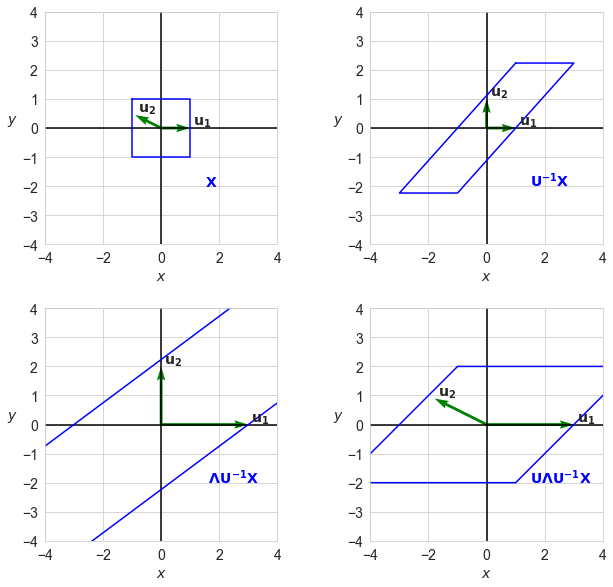

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4)
xlims = [-4, 4]
ylims = [-4, 4]
make_decor(ax, xlims, ylims)

for i, axi in enumerate(ax.flatten()):
    axi.plot(Sqn[i][0,:], Sqn[i][1,:], color='b')
    axi.quiver(*origin, Un[i][0,:], Un[i][1,:], color=['g'],
               width=0.012, angles='xy', scale_units='xy', scale=1)
    axi.text(*(Un[i].T[0]+[.1,.1]), "$\mathbf{u_1}$")
    axi.text(*(Un[i].T[1]+[.1,.1]), "$\mathbf{u_2}$")
    axi.text(1.5, -2, Sqn_str[i], color='b')

### Сингулярное разложение

$A = U \Sigma V^\top$

In [9]:
U, sgm, Vt = LA.svd(C)

print('sigma = ')
np.disp(sgm)
print('U = ')
np.disp(U)
print('Vt = ')
np.disp(Vt)

sigma = 
[3.81061639 1.57454841]
U = 
[[ 0.9347217  -0.35538056]
 [ 0.35538056  0.9347217 ]]
Vt = 
[[ 0.73588229  0.67710949]
 [-0.67710949  0.73588229]]


In [10]:
Sq1 = Vt @ Sq
Sq2 = np.diag(sgm) @ Sq1
Sq3 = U @ Sq2
Sqn = [Sq, Sq1, Sq2, Sq3]
Sqn_str = ["$\mathbf{X}$", "$\mathbf{V^T X}$",
          "$\mathbf{\Sigma V^T X}$", "$\mathbf{U \Sigma V^T X}$"]

V = Vt.T
V1 = Vt @ V
V2 = np.diag(sgm) @ V1
V3 = U @ V2
Vn = [V, V1, V2, V3]

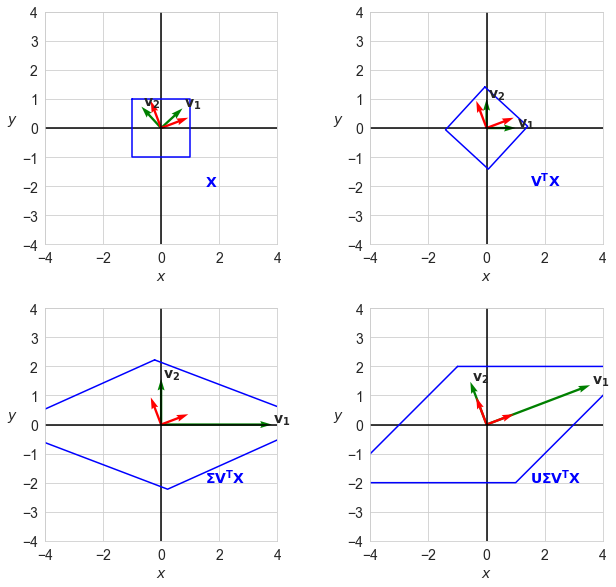

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4)
make_decor(ax, xlims, ylims)

for i, axi in enumerate(ax.flatten()):
    axi.plot(Sqn[i][0,:], Sqn[i][1,:], color='b')
    axi.quiver(*origin, Vn[i][0,:], Vn[i][1,:], color=['g'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.quiver(*origin, U[0,:], U[1,:], color=['r'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.text(*(Vn[i].T[0]+[.05,.05]), "$\mathbf{v_1}$")
    axi.text(*(Vn[i].T[1]+[.05,.05]), "$\mathbf{v_2}$")
    axi.text(1.5, -2, Sqn_str[i], color='b')

### Связь с полярным разложением

$A = U \Sigma V^\top = U \Sigma U^\top U V^\top = S_1Q$

In [14]:
S1 = U @ np.diag(sgm) @ U.T
Q = U @ Vt

In [15]:
X1 = Q @ Sq
X2 = S1 @ X1
Xn = [Sq, X1, X2]
Xn_str = ["$\mathbf{X}$", "$\mathbf{QX}$", "$\mathbf{S_1QX}$"]

V1 = Q @ V
V2 = S1 @ V1
Vn = [V, V1, V2]

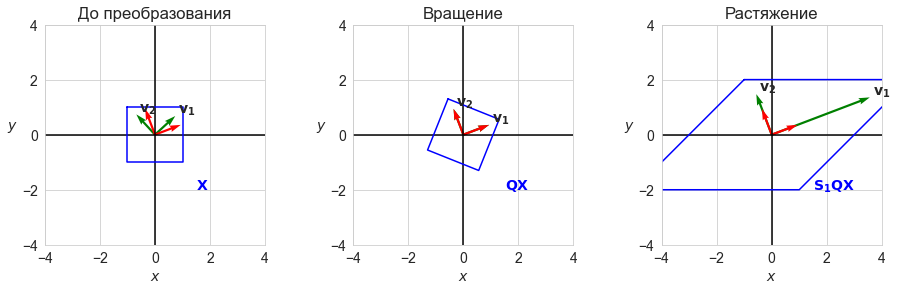

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.4)
make_decor(ax, xlims, ylims)
titles = ["До преобразования", "Вращение", "Растяжение"]

for i, axi in enumerate(ax.flatten()):
    axi.plot(Xn[i][0,:], Xn[i][1,:], color='b')
    axi.quiver(*origin, Vn[i][0,:], Vn[i][1,:], color=['g'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.quiver(*origin, U[0,:], U[1,:], color=['r'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.set_title(titles[i])
    axi.text(*(Vn[i].T[0]+[.1,.1]), "$\mathbf{v_1}$", fontsize=14)
    axi.text(*(Vn[i].T[1]+[.1,.1]), "$\mathbf{v_2}$", fontsize=14)
    axi.text(1.5, -2, Xn_str[i], color='b', fontsize=14)

$A = U \Sigma V^\top = U V^\top V \Sigma V^\top = QS_2$

In [17]:
Q = U @ Vt
S2 = V @ np.diag(sgm) @ Vt

In [18]:
X1 = S2 @ Sq
X2 = Q @ X1
Xn = [Sq, X1, X2]
Xn_str = ["$\mathbf{X}$", "$\mathbf{S_2X}$", "$\mathbf{QS_2X}$"]

V1 = S2 @ V
V2 = Q @ V1
Vn = [V, V1, V2]

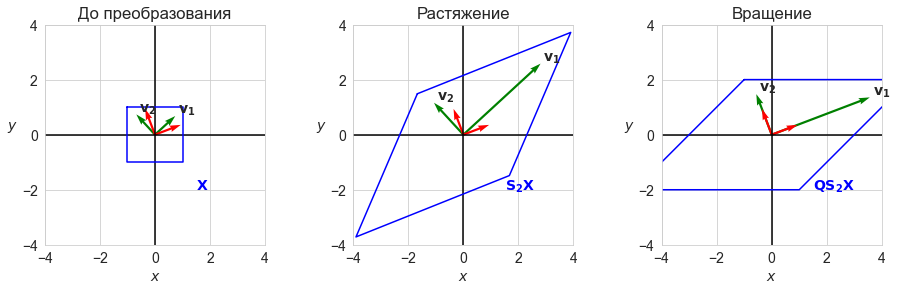

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.4)
make_decor(ax, xlims, ylims)
titles = ["До преобразования", "Растяжение", "Вращение"]

for i, axi in enumerate(ax.flatten()):
    axi.plot(Xn[i][0,:], Xn[i][1,:], color='b')
    axi.quiver(*origin, Vn[i][0,:], Vn[i][1,:], color=['g'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.quiver(*origin, U[0,:], U[1,:], color=['r'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.set_title(titles[i])
    axi.text(*(Vn[i].T[0]+[.1,.1]), "$\mathbf{v_1}$", fontsize=14)
    axi.text(*(Vn[i].T[1]+[.1,.1]), "$\mathbf{v_2}$", fontsize=14)
    axi.text(1.5, -2, Xn_str[i], color='b', fontsize=14)

---

## Источники ##

1. *Беклемишев Д.В.* Дополнительные главы линейной алгебры. &mdash; М.: Наука, 1983. &mdash; 336 с.
1. [Материалы](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d) автора [Reza Bagheri](https://reza-bagheri79.medium.com/).

In [11]:
# Versions used
import sys
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.9.7
numpy: 1.20.3
matplotlib: 3.4.3
seaborn: 0.11.2
